## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data =pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv");

In [3]:
data.iloc[:5]

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [4]:
data.iloc[-5:]

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [5]:
data.isnull().values.any() # No missing value

False

In [6]:
numeric = []
binary = []
ordinal = ['savings','employment_duration','installment_rate','present_residence','number_credits']
categorical = []

for column in data.columns:
  if data[column].dtype == 'int64':
    numeric.append(column)
  elif data[column].nunique() == 2:
    if column!="credit_risk":
      binary.append(column)
  else:
     if column not in ordinal:
       categorical.append(column)


print(f'Numeric: {numeric}')
print(f'Binary: {binary}')
print(f'Ordinal: {ordinal}')
print(f'Categorical: {categorical}')

Numeric: ['duration', 'amount', 'age']
Binary: ['people_liable', 'telephone', 'foreign_worker']
Ordinal: ['savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits']
Categorical: ['status', 'credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job']


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [7]:
data[['amount','purpose']].groupby(['purpose']).mean()

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [8]:
print(f"Rent house under 30: {data[(data['age']<30) & (data['housing']=='rent')].shape[0] / data[ data['age']<30 ].shape[0]}")
print(f"Rent house under 40: {data[(data['age']<40) & (data['housing']=='rent')].shape[0] / data[ data['age']<40 ].shape[0]}")

Rent house under 30: 0.6666666666666666
Rent house under 40: 0.7261055634807418


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [9]:
data[(data['foreign_worker'] == 'yes') & (data['number_credits'] > '3')].shape[0]

1

### Задание 6 (1 балл)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = [16, 8]

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

<ipython-input-11-4b97a34ed9df>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  cos = plt.plot(x,np.cos(x),'g--',color = 'm')


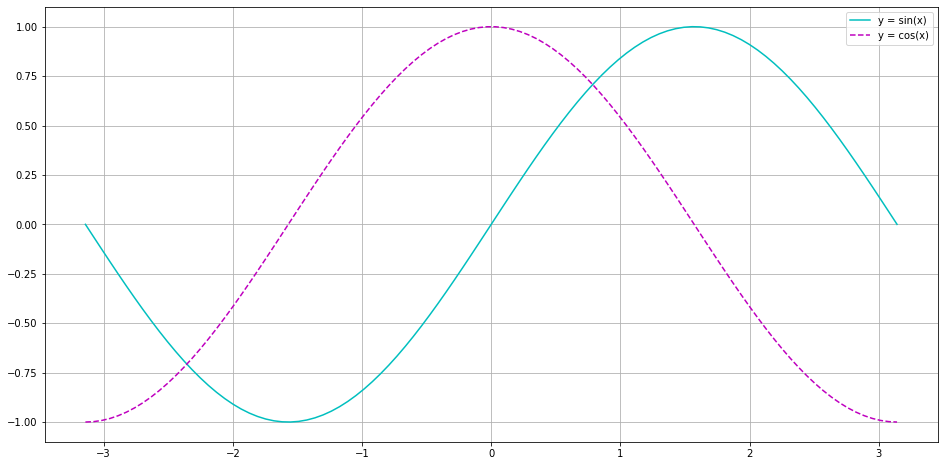

In [11]:
x = np.linspace(-np.pi,np.pi,100)
sin = plt.plot(x,np.sin(x), color = 'c')
cos = plt.plot(x,np.cos(x),'g--',color = 'm')
plt.legend(["y = sin(x)","y = cos(x)"])
plt.grid()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

Text(0.5, 0.98, 'Status of checking accounts')

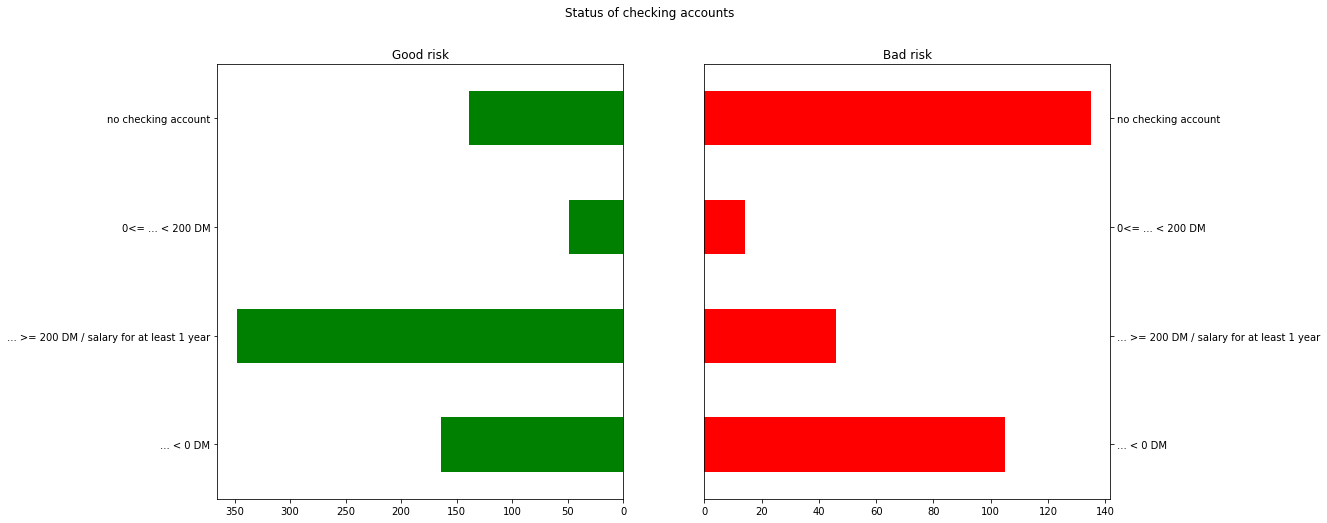

<Figure size 4500x1500 with 0 Axes>

In [12]:
fig,axes=plt.subplots(1,2)
plt.figure(figsize=(15, 5), dpi=300)

data[['status','credit_risk']][data['credit_risk'] == 'good'].groupby('status').count().plot(ax=axes[0],kind='barh',color='g',legend=False)
axes[0].set_title("Good risk")
axes[0].invert_xaxis()
axes[0].set_ylabel(None)

data[['status','credit_risk']][data['credit_risk'] == 'bad'].groupby('status').count().plot(ax=axes[1],kind='barh',color='r',legend=False)
axes[1].set_title("Bad risk")
axes[1].yaxis.set_ticks_position("right")
axes[1].set_ylabel(None)

fig.suptitle("Status of checking accounts")



### Задание 8  (0.5 балла)

In [13]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

<AxesSubplot:xlabel='savings', ylabel='Count'>

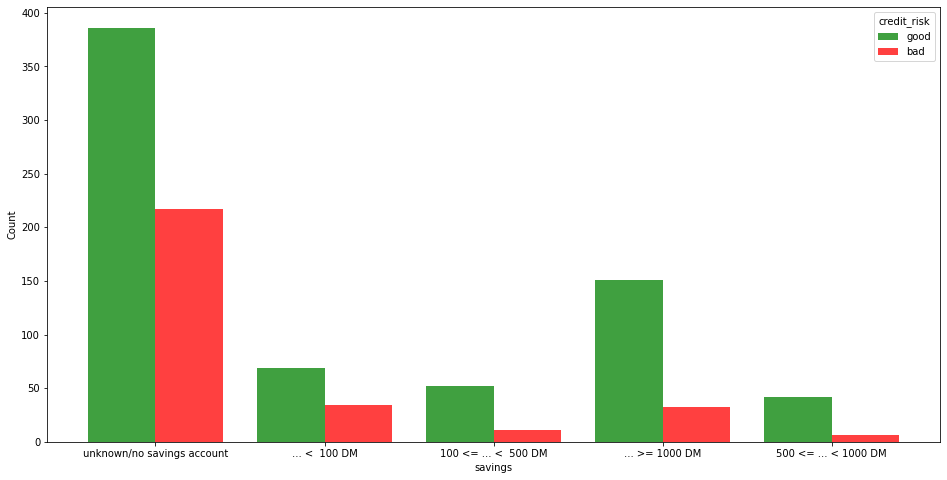

In [14]:
sns.histplot(data, x="savings", hue="credit_risk", linewidth=0, palette=['g','r'],multiple="dodge", shrink=.8)

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

<AxesSubplot:xlabel='savings', ylabel='age'>

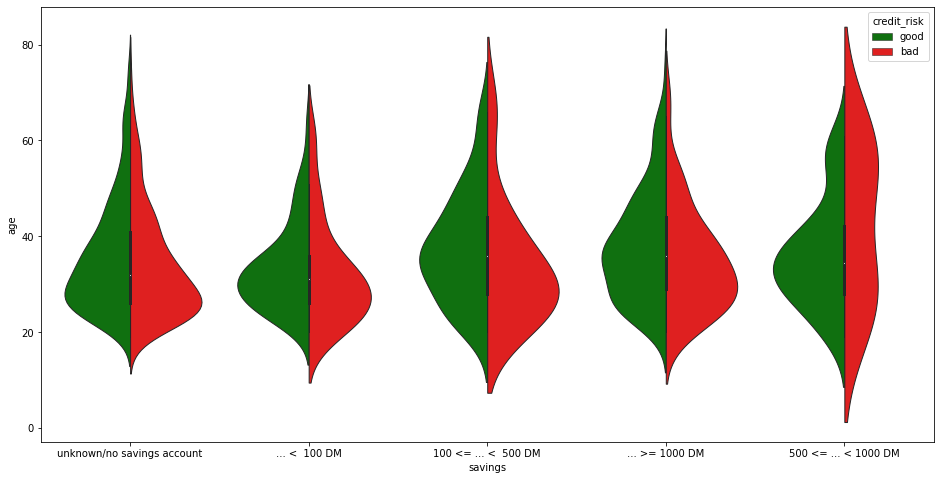

In [15]:
sns.violinplot(data=data, x="savings", y="age", hue="credit_risk", split=True,  linewidth=1, palette=['g','r'])

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

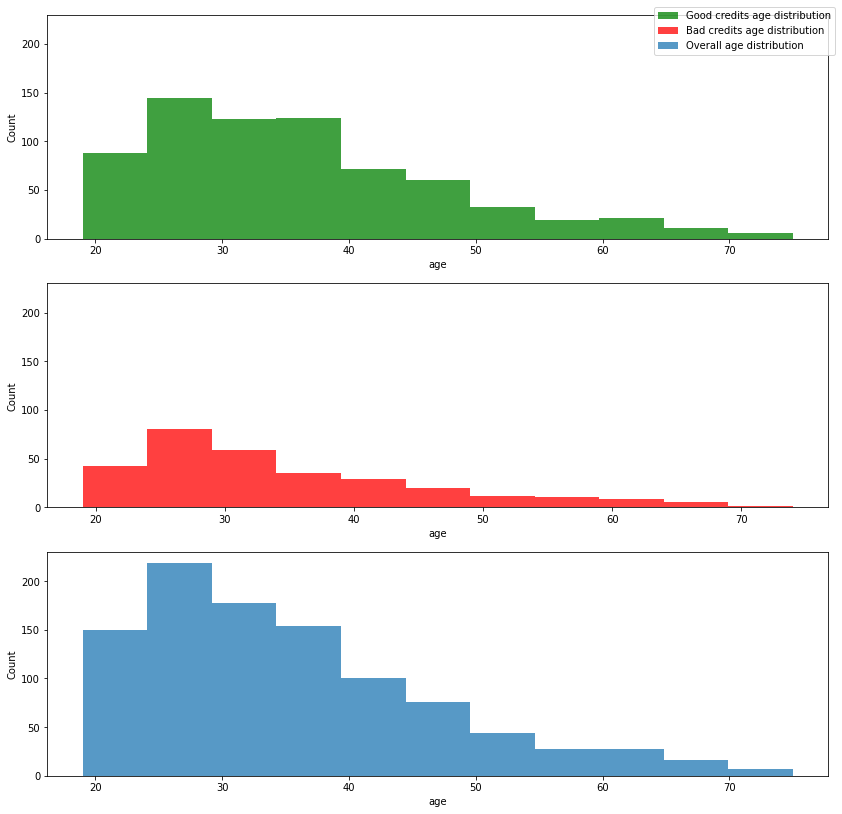

In [16]:
plt.rcParams["figure.figsize"] = [14, 14]
fig,axes=plt.subplots(3,1)

g = sns.histplot(ax=axes[0], data=data[data['credit_risk']=='good'], x="age",bins=11, linewidth=0, color='g')
b = sns.histplot(ax=axes[1], data=data[data['credit_risk']=='bad'], x="age", bins =11, linewidth=0,color='r')
o = sns.histplot(ax=axes[2], data=data, x="age", bins =11, linewidth=0,color='C0')
for i in range(3):
  axes[i].set_ylim([0, 230])


fig.legend(labels=["Good credits age distribution","Bad credits age distribution","Overall age distribution"], bbox_to_anchor=(0.912,0.893))
plt.rcParams["figure.figsize"] = [16, 8]

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

Text(0, 0.5, 'Duration')

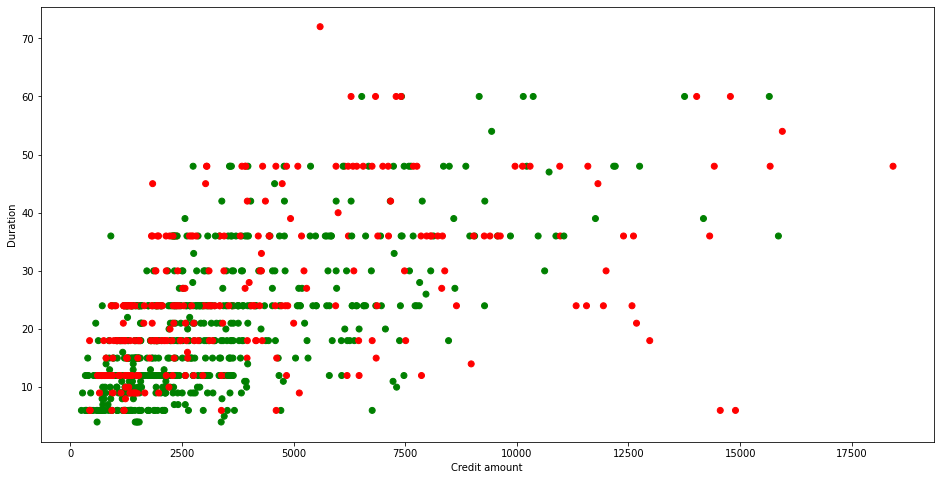

In [17]:
plt.scatter(data['amount'], data['duration'], c = data['credit_risk'].map({'good':'g','bad':'r'}))
plt.xlabel("Credit amount")
plt.ylabel("Duration")

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

Text(0.5, 0, 'Age')

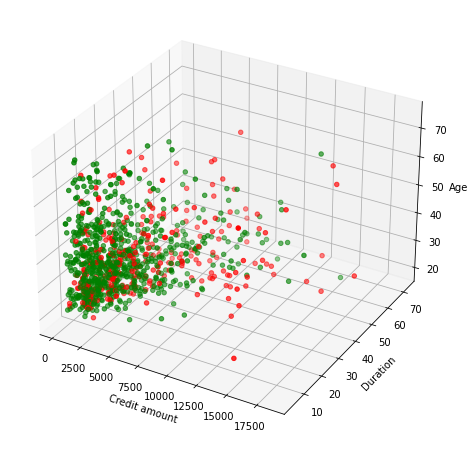

In [18]:
fig = plt.figure()
ax = plt.axes(projection ="3d")

ax.scatter(data['amount'], data['duration'], data['age'], c=data['credit_risk'].map({'good':'g','bad':'r'}))
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [19]:
for column in categorical:
  if column in data:
    del data[column]

for type in [binary,ordinal]:
  for column in type:
    values = {value: index for index, value in enumerate(sorted(data[column].unique().tolist()))}
    data[column] = data[column].apply(lambda x: values[x])

In [20]:
data['credit_risk'] = data['credit_risk'].apply(lambda x: 1 if x=="good" else 0) # for the №14

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [21]:
def predict(Xtrain:np.array, Ytrain:np.array, Xtest: np.array) -> np.array:
  w = np.reciprocal((np.amax(Xtrain, axis = 0)).astype(float))
  w /= Xtrain.shape[1]
  w[1]*=-1
  w[6]*=-1
  w[7]*=-1
  w[10]*=-1
  result = np.zeros(Xtest.shape[0])
  for index in range(result.shape[0]):
    result[index]= 1 if np.sum(np.dot(Xtest[index],w))+0.1 >= 0. else 0
  return result

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
accuracy_score(y_test, predict(X_train, y_train, X_test))

<ipython-input-21-c99726258209>:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk', 1).values


0.656